In [1]:
# importing required packages for building classification machine learning model
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score, confusion_matrix #to check the accuracy of the model

In [2]:
# reading forest types datasets which is downloaded from UCI
# https://archive.ics.uci.edu/ml/datasets/Forest+type+mapping
# download the data and upload it to Kaggle by clicking "Add Data"
df_train = pd.read_csv('../input/training.csv')
df_Test = pd.read_csv('../input/testing.csv')

In [3]:
# displaying top 5 records to check whether its reading properly from kaggle server
# here the first column 'class' is the output and rest of the columns are inputs
# so we need to split the datasets into two
# 1 dataset contains only output, (i.e) column 'class'
# 2 dataset will have rest of the columns
df_train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,75.70,14.86,40.35,7.97,-32.92,-38.92,-14.94,4.47,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,30.58,20.42,39.83,-16.74,-24.92,-36.33,-15.67,8.16,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,63.20,26.70,49.28,3.25,-24.89,-30.38,-3.60,4.15,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,55.54,24.50,47.90,-6.20,-20.98,-30.28,-5.03,7.77,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,59.44,2.62,32.02,-1.33,-37.99,-43.57,-34.25,1.83,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [4]:
df_train['class'].unique()
# Class: 's' ('Sugi' forest), 'h' ('Hinoki' forest), 'd' ('Mixed deciduous' forest), 'o' ('Other' non-forest land)

array(['d ', 'h ', 's ', 'o '], dtype=object)

In [5]:
X_train = df_train.iloc[:, 1:].values # extracting inputs from training dataset - column 1 to till end
y_train = df_train.iloc[:, 0].values # extracting output from training dataset - column 0

X_test = df_Test.iloc[:, 1:].values # extracting inputs from testing dataset - column 1 to till end
y_test = df_Test.iloc[:, 0].values # extracting output from training dataset - column 0

In [6]:
# Feature Scaling - Our dataset values are not scaled, (i.e) columns values are not in specific range
# By applying feature scaling - the sum of values in all columns will be zero
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Implementing through Logistic Regression Algorithm which has highest accuracy - 86%**

In [7]:
# implementing through logistic regression algorithm with penalty l1 and liblinear solver - 86%
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty ='l1',solver='liblinear',
                                multi_class='ovr', C=6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

86.46153846153845


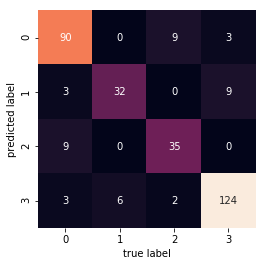

In [8]:
# displaying confusion matrix for calculating accuracy
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [9]:
# implementing through random forest algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

83.07692307692308


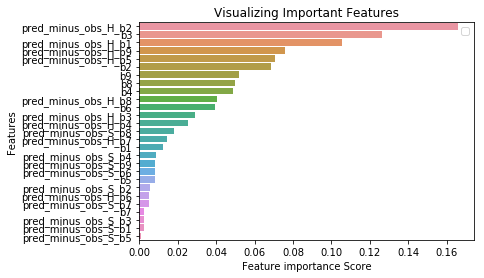

In [10]:
# to check feature importance
feature_imp = pd.Series(classifier.feature_importances_, index= df_train.columns[1:]).sort_values(ascending=False)
sns.barplot(x=feature_imp, y =feature_imp.index)
plt.xlabel('Feature importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend(handles=[])
plt.show()

In [11]:
# Saving inner decision trees generated by random forest algorithm
col = df_train.columns[1:]
dotfile = six.StringIO()
i_tree = 1
for tree_in_forest in classifier.estimators_:
    export_graphviz(tree_in_forest,out_file='tree.dot',
    feature_names=col,
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1

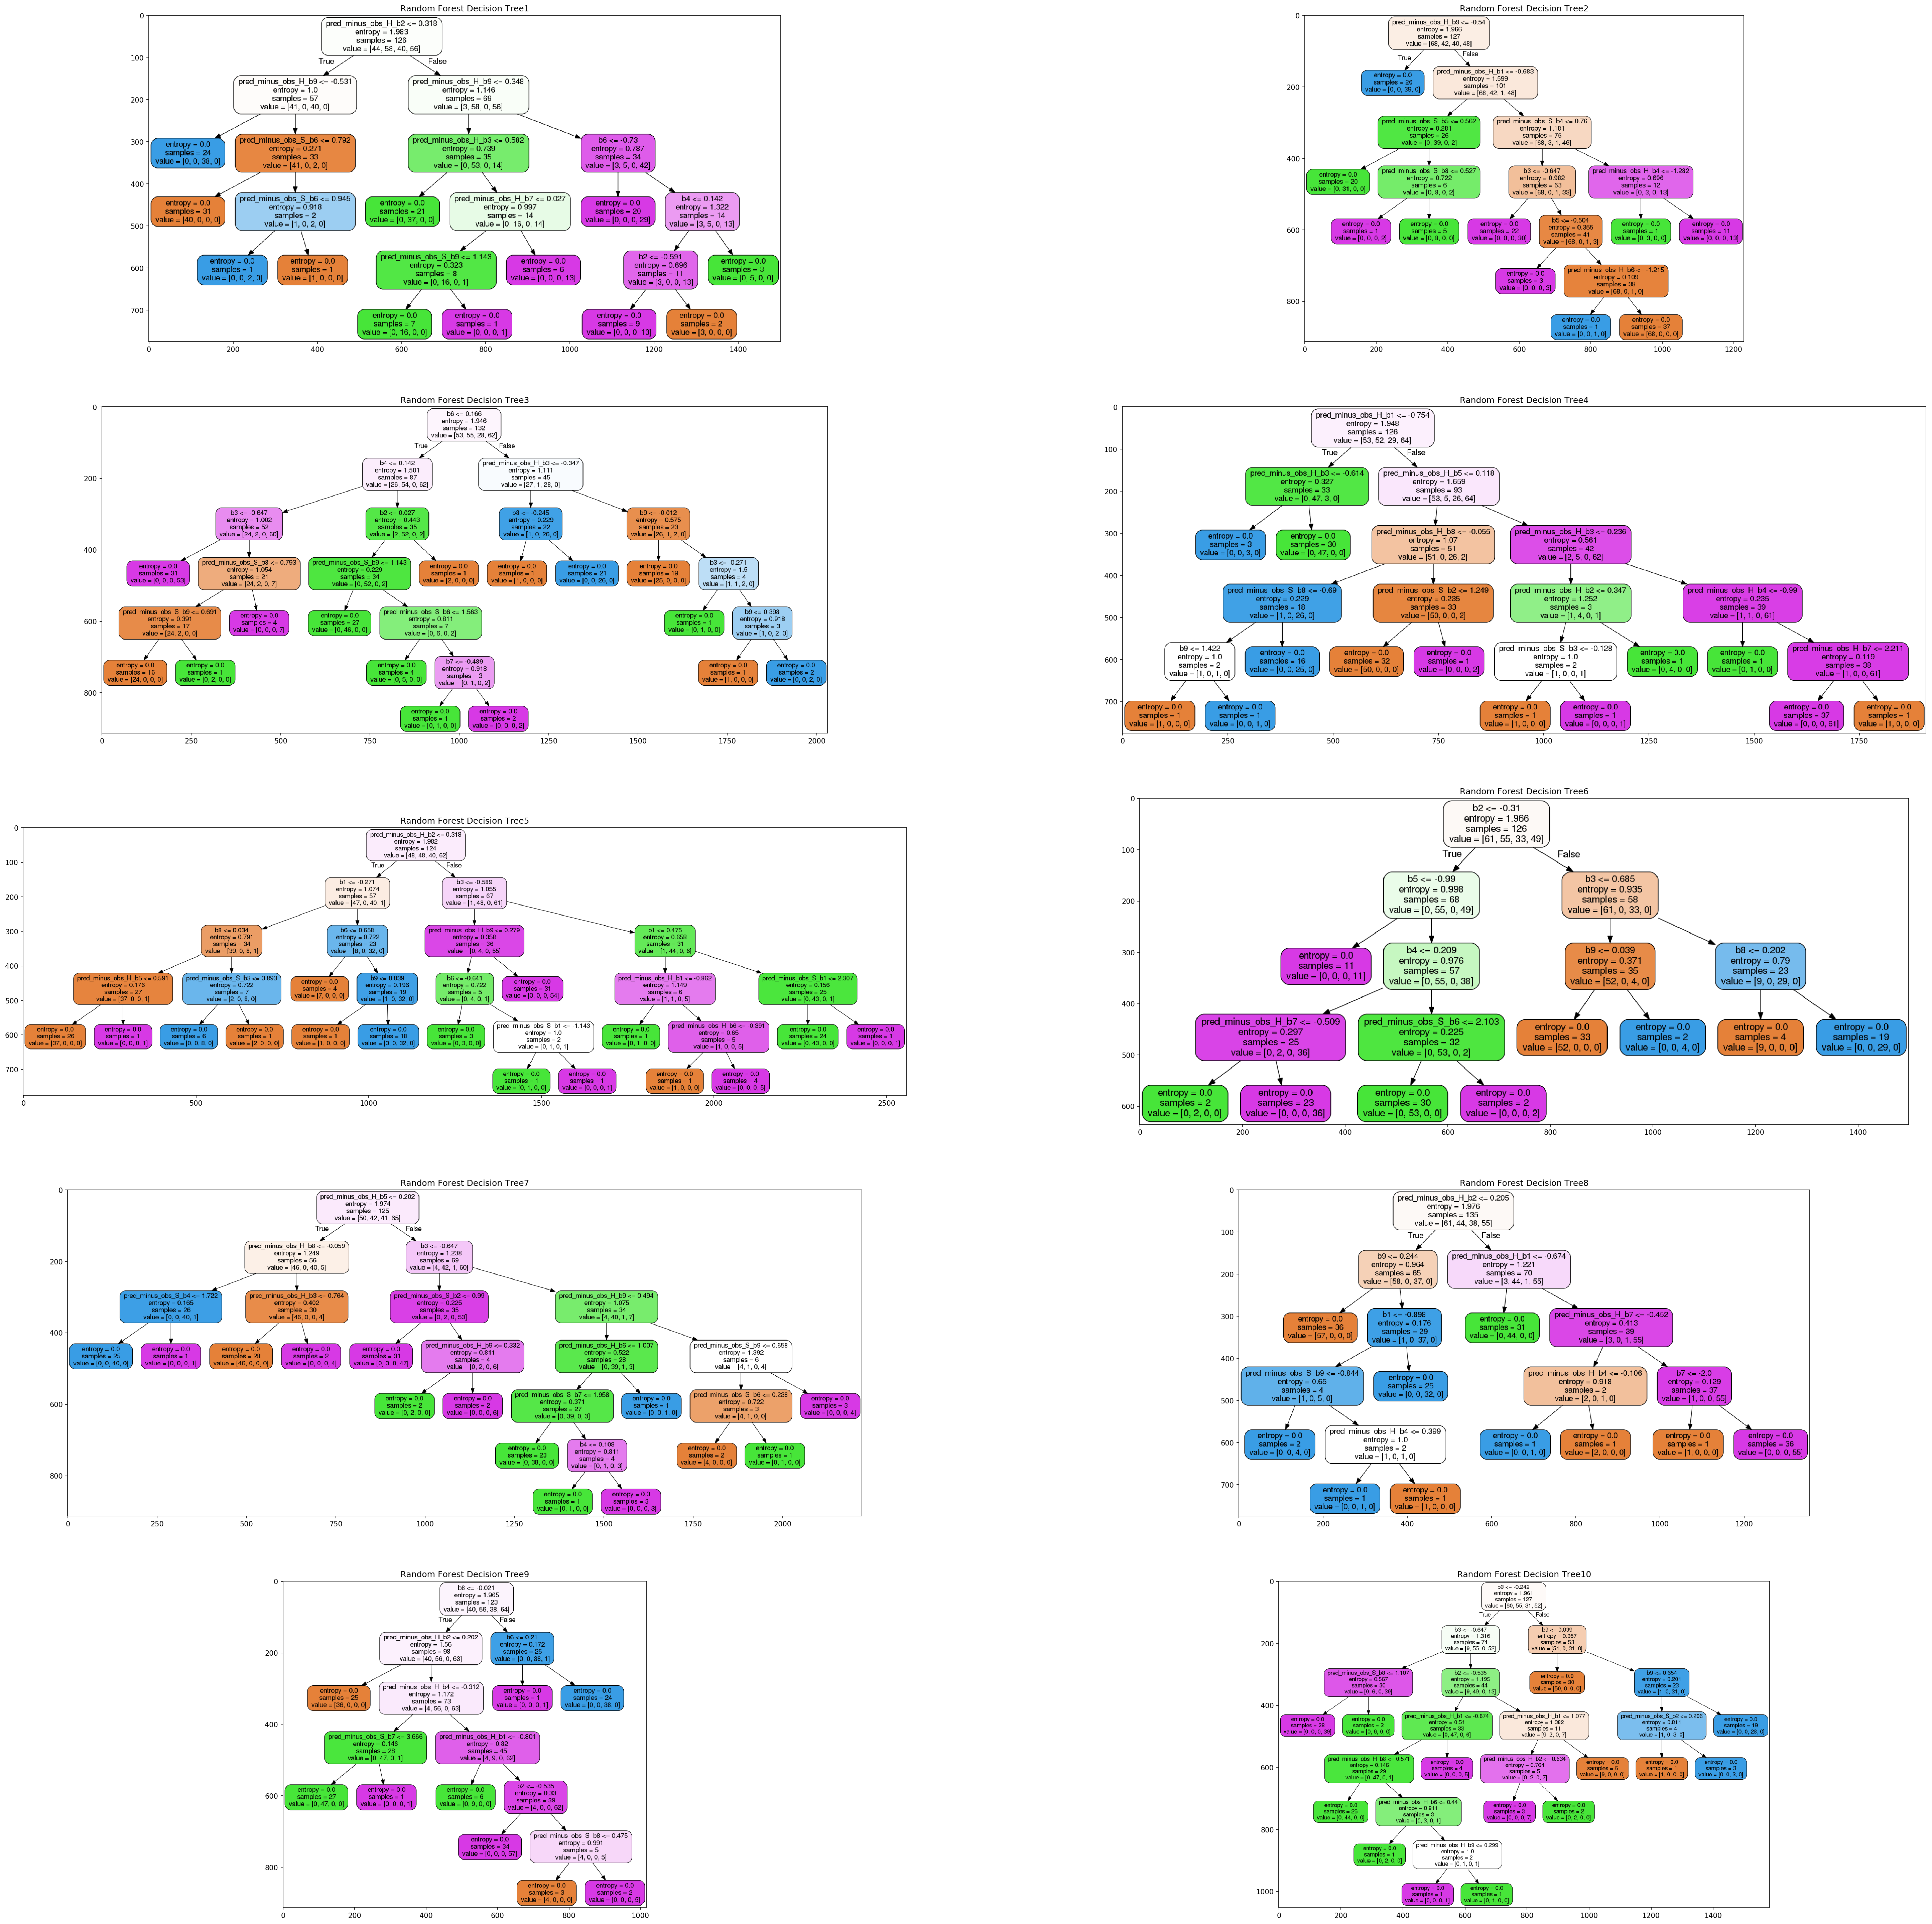

In [12]:
# Showing inner decision trees generated by random forest algorithm
fig=plt.figure(figsize=(50, 50), dpi=150, facecolor='w', edgecolor='k')
columns = 2
rows = 5
for i in range(1, 11):
    img = mpimg.imread('tree' + str(i) + '.png')    
    fig.add_subplot(rows, columns, i)
    plt.title('Random Forest Decision Tree' + str(i))
    plt.imshow(img)
plt.show()

**Implementing through other algorithm which has accuracy less than random forest**

In [13]:
# implementing through naive bayes algorithm - 80%
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

80.3076923076923


In [14]:
# implementing through XGB classifier algorithm - 78%
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

78.76923076923077


In [15]:
# implementing through decision tree algorithm - 76%
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

76.0
